Import librari

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import pickle

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.duplicated().sum()

df = df.drop_duplicates()

df.duplicated().sum()

0

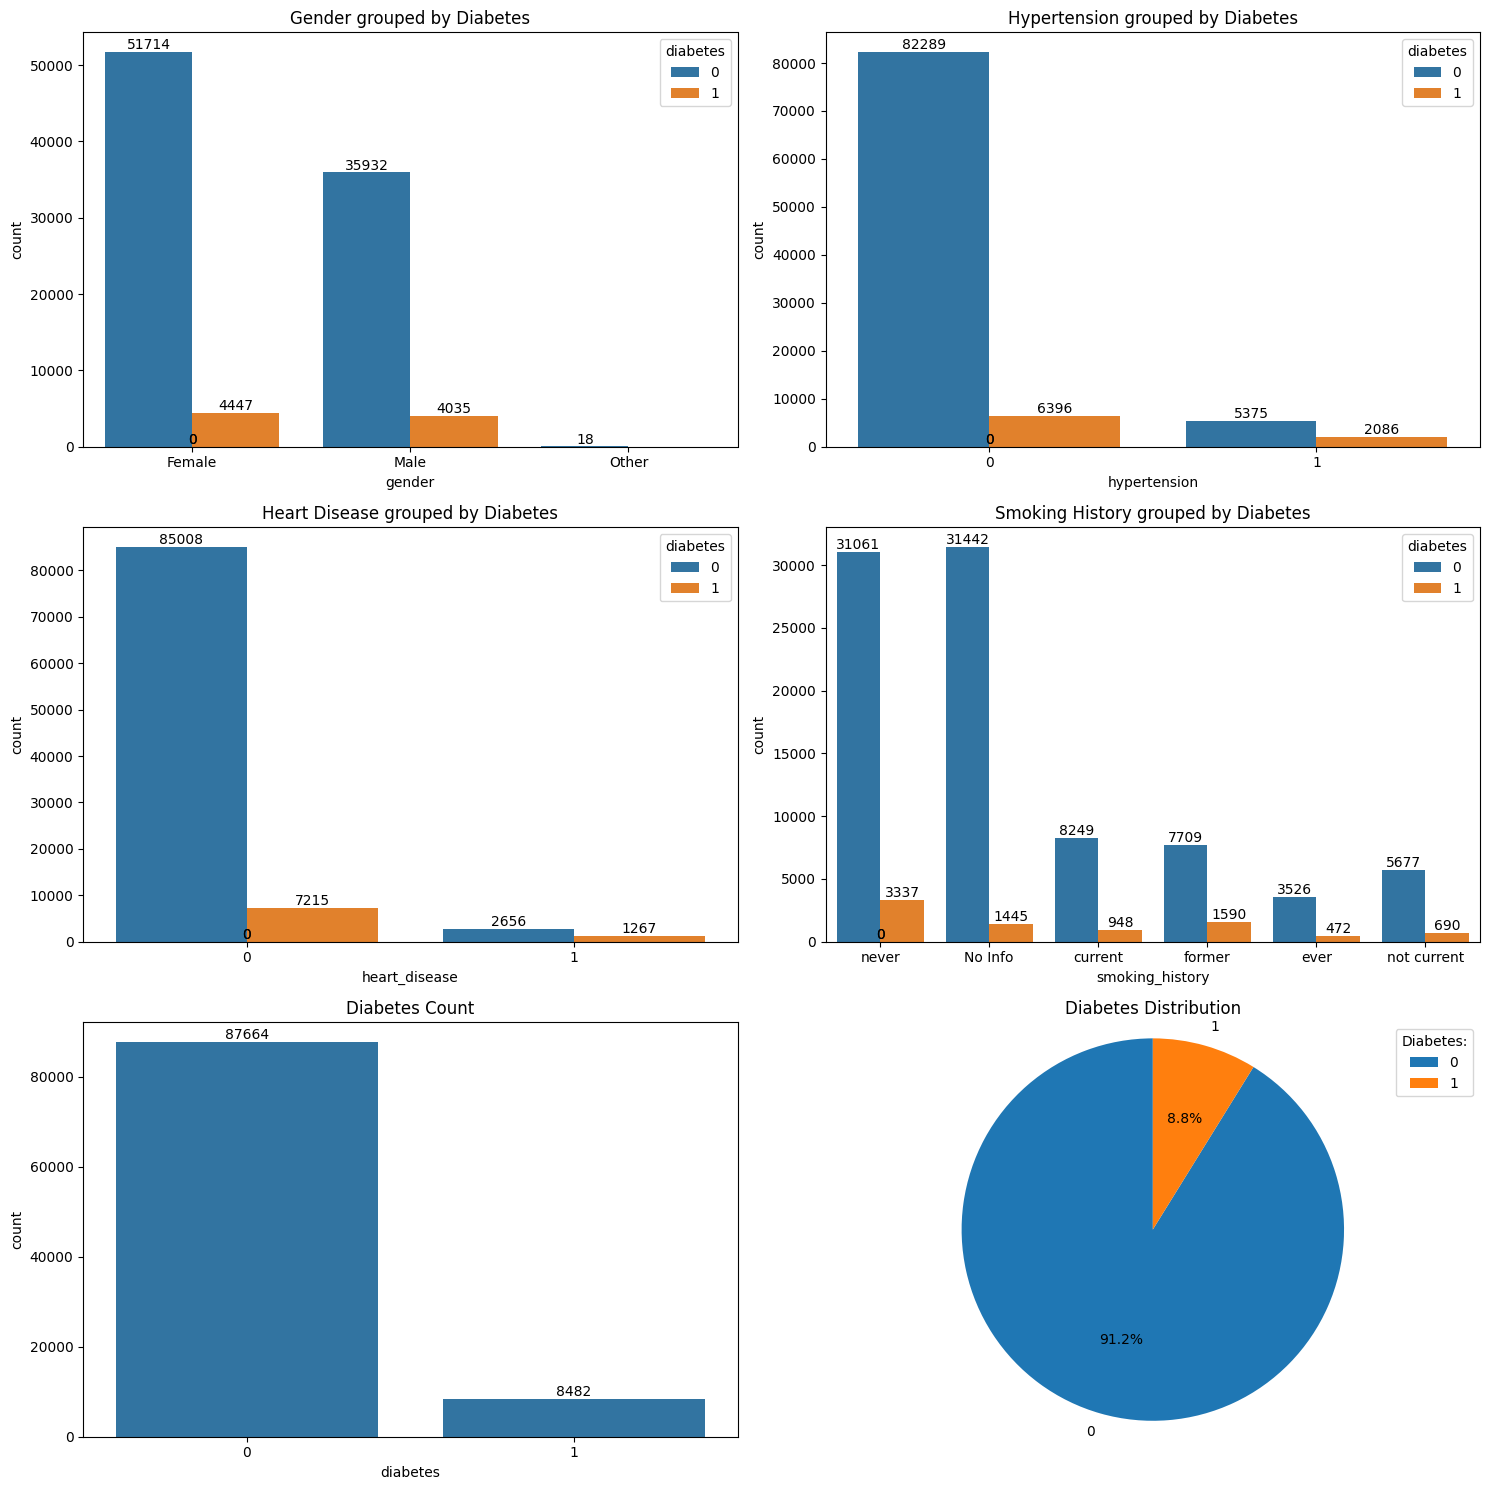

In [8]:
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal') 
axes[2, 1].legend(title='Diabetes:', loc='upper right')
plt.tight_layout()
plt.show()

Calculate minimum, maximum, and average age

Minimum age: 0.08
Maximum age: 80.0
Average age: 41.79432571297817
Diabetes Counts:
diabetes
0    87664
1     8482
Name: count, dtype: int64
Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0


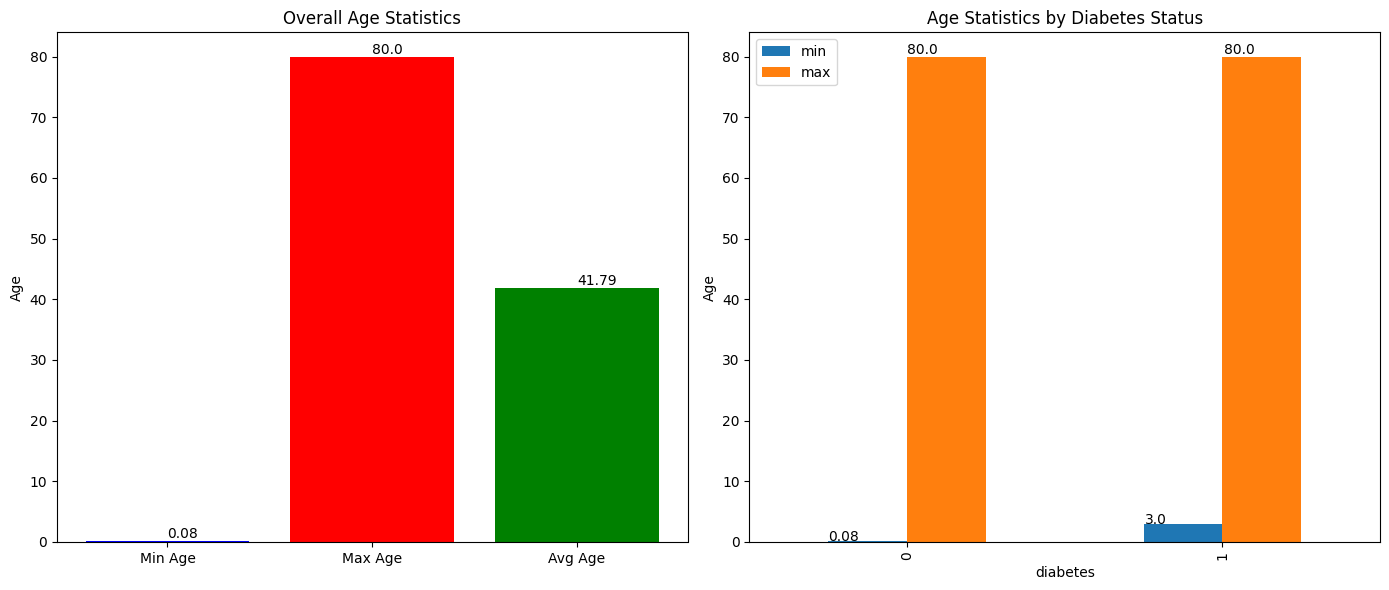

In [9]:
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

diabetes_counts = df['diabetes'].value_counts()

grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])

print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("Diabetes Counts:")
print(diabetes_counts)
print("Age Statistics by Diabetes Status:")
print(grouped_ages)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['blue', 'red', 'green'])
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Add text to the top of the bars

grouped_bars = grouped_ages.plot(kind='bar', ax=ax[1])
ax[1].set_title('Age Statistics by Diabetes Status')
ax[1].set_ylabel('Age')

for p in grouped_bars.patches:
    grouped_bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()

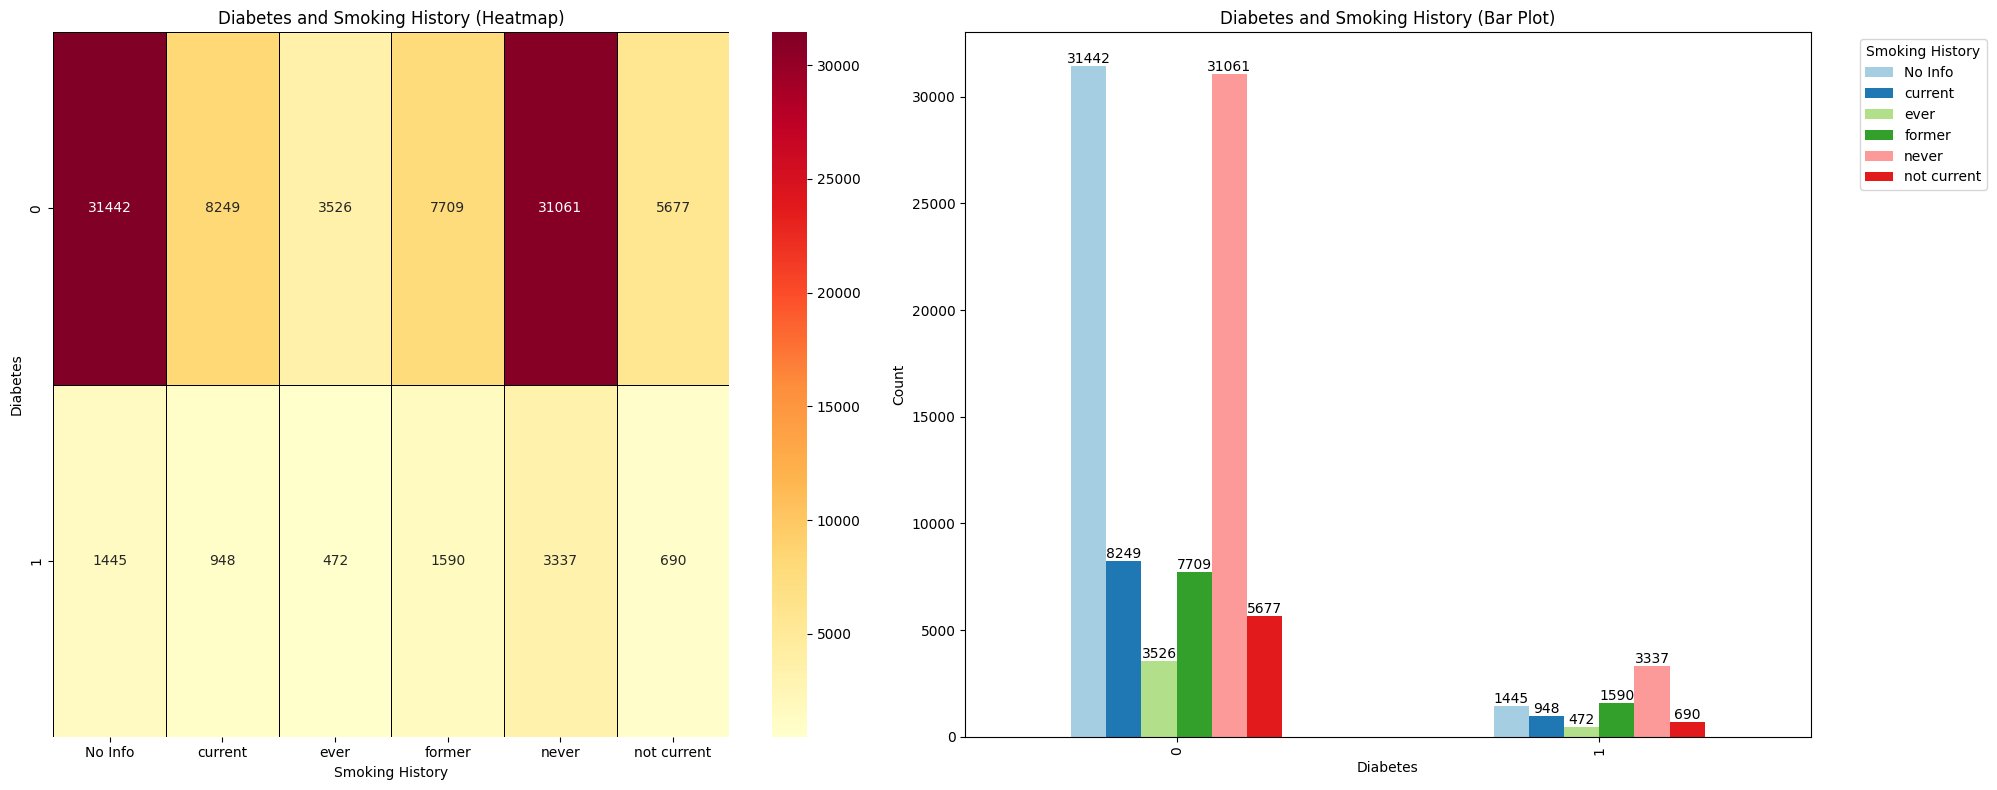

In [10]:
cross_table = pd.crosstab(df['diabetes'], df['smoking_history'])

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(cross_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, linecolor='black', ax=ax[0])
ax[0].set_title('Diabetes and Smoking History (Heatmap)')
ax[0].set_xlabel('Smoking History')
ax[0].set_ylabel('Diabetes')

cross_table.plot(kind='bar', stacked=False, ax=ax[1], color=plt.cm.Paired.colors)
ax[1].set_title('Diabetes and Smoking History (Bar Plot)')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Count')
ax[1].legend(title='Smoking History', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax[1].containers:
    ax[1].bar_label(container)

plt.tight_layout()
plt.show()

In [11]:
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])


In [12]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


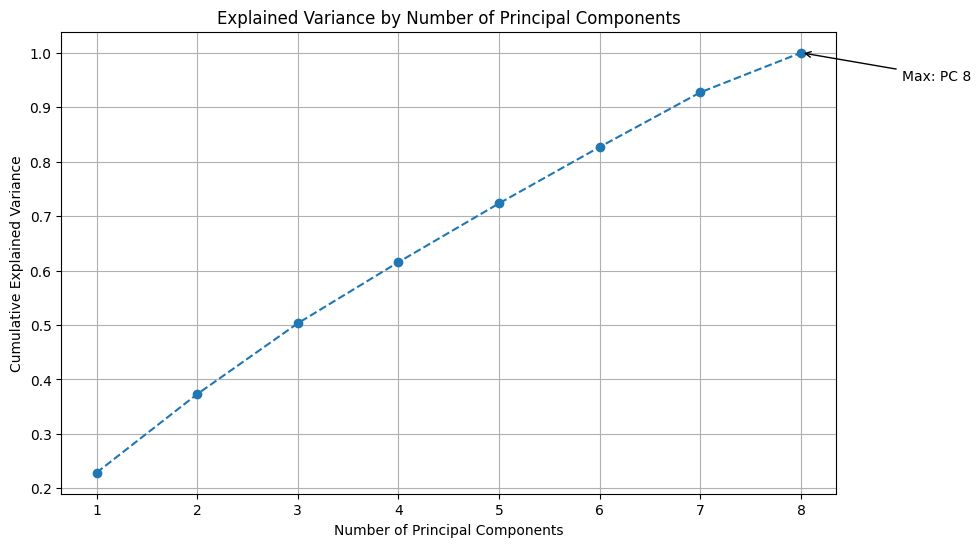

Principal Component 1: 0.2287 cumulative explained variance
Principal Component 2: 0.3729 cumulative explained variance
Principal Component 3: 0.5031 cumulative explained variance
Principal Component 4: 0.6154 cumulative explained variance
Principal Component 5: 0.7234 cumulative explained variance
Principal Component 6: 0.8270 cumulative explained variance
Principal Component 7: 0.9273 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [13]:

# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

max_index = pca.explained_variance_ratio_.cumsum().argmax()

plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()

for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

n_components = max_index + 1

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Model 1

In [14]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initializing and training the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions
y_pred = gb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy:.4f}')
print(f'Gradient Boosting Classification Report:\n{classification_report(y_test, y_pred)}')




Gradient Boosting Accuracy: 0.9635
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26267
           1       0.94      0.64      0.76      2577

    accuracy                           0.96     28844
   macro avg       0.95      0.82      0.87     28844
weighted avg       0.96      0.96      0.96     28844



Confusion Matrix

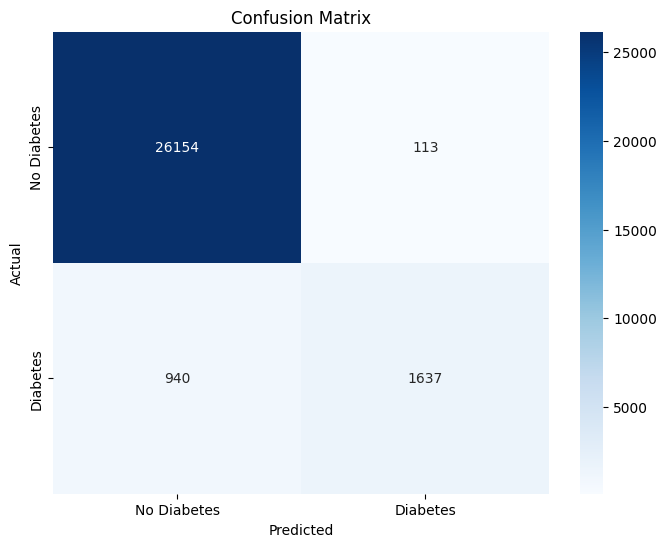

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Save Modell

In [16]:
with open('Diabetes_model.sav', 'wb') as f:
    pickle.dump(gb_model, f)

Predict Custom 

In [25]:
import joblib
model_1 = joblib.load("Diabetes_model.sav")
custom_data = [
    [1, 45, 0, 0, 1, 25.6, 6.5, 110],
    [0, 35, 1, 0, 0, 28.2, 7.2, 130],
    [1, 55, 1, 1, 1, 31.4, 8.0, 150],
    [0, 42, 0, 1, 0, 26.9, 7.0, 120],
    [1, 50, 1, 0, 1, 29.7, 7.8, 140],
    [1, 67, 0, 1, 1, 27.3, 6.5, 200]
]

custom_df = pd.DataFrame(custom_data, columns=features)

custom_X = scaler.transform(custom_df[features])

custom_X_pca = pca.transform(custom_X)

custom_predictions = model_1.predict(custom_X_pca)

for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(f"Person {i+1} is not predicted to have diabetes.")
    else:
        print(f"Person {i+1} is predicted to have diabetes.")

Person 1 is not predicted to have diabetes.
Person 2 is not predicted to have diabetes.
Person 3 is predicted to have diabetes.
Person 4 is not predicted to have diabetes.
Person 5 is predicted to have diabetes.
Person 6 is not predicted to have diabetes.
